

```
# This is formatted as code
```



## Calculate Daily Changes and Rolling Volume Statistics

 It calculates the daily price change and the percentage price change based on the opening and closing prices. It also computes a 10-day rolling mean and standard deviation for the trading volume.




## Calculate Mean and Standard Deviation

It computes the mean and standard deviation of the mean and standard deviation of the 'percentage_price_change' and 'volume' columns across the entire dataset. These statistics represent the typical variation in price changes and trading volume.

## Define Anomaly Thresholds

An anomaly is defined as a data point that falls outside a certain range around the mean. In this code, the threshold is set at 3 standard deviations from the mean. This means a day is flagged as a potential anomaly if its absolute percentage price change is greater than the mean plus three times the standard deviation of percentage price change, OR if its trading volume is greater than the mean plus three times the standard deviation of volume.



## Filter for Anomalies

The code then filters the DataFrame to select only the rows (trading days) where either the percentage price change or the volume exceeds their respective 3-standard-deviation thresholds.

## Combine and Display Anomalies

Finally, it combines the price anomalies and volume anomalies, removes any duplicate entries, sorts them by date, and displays the first few potential anomalies and the total count.


# The code

In [1]:
import pandas as pd

df = pd.read_csv('AAL.csv')

In [2]:
df['price_change'] = df['close'] - df['open']
df['percentage_price_change'] = (df['price_change'] / df['open']) * 100
df['volume_rolling_mean'] = df['volume'].rolling(window=10).mean()
df['volume_rolling_std'] = df['volume'].rolling(window=10).std()
display(df.head(15))

,date,volume,open,high,low,close,adjclose,price_change,percentage_price_change,volume_rolling_mean,volume_rolling_std
0,2020-07-02,86074800,13.350000,13.420000,12.420000,12.500000,12.500000,-0.850000,-6.367044,NaN,NaN
1,2020-07-01,116661700,13.480000,14.290000,12.630000,12.810000,12.810000,-0.669999,-4.970320,NaN,NaN
2,2020-06-30,69607700,13.100000,13.480000,12.880000,13.070000,13.070000,-0.030001,-0.229013,NaN,NaN
3,2020-06-29,115051100,12.570000,13.510000,12.020000,13.320000,13.320000,0.750000,5.966587,NaN,NaN
4,2020-06-26,108813000,13.200000,13.290000,12.130000,12.380000,12.380000,-0.820000,-6.212119,NaN,NaN
5,2020-06-25,117383400,12.530000,13.240000,12.180000,13.170000,13.170000,0.640000,5.107744,NaN,NaN
6,2020-06-24,140975500,13.590000,13.900000,12.830000,13.040000,13.040000,-0.550000,-4.047095,NaN,NaN
7,2020-06-23,204022300,13.760000,14.290000,13.710000,14.000000,14.000000,0.240000,1.744184,NaN,NaN
8,2020-06-22,118994500,14.900000,15.520000,14.720000,14.920000,14.920000,0.020000,0.134231,NaN,NaN
9,2020-06-19,92320200,16.889999,16.940001,15.420000,16.000000,16.000000,-0.889999,-5.269387,116990420.0,3.656692e+07


In [3]:
price_change_mean = df['percentage_price_change'].mean()
price_change_std = df['percentage_price_change'].std()
volume_mean = df['volume'].mean()
volume_std = df['volume'].std()

In [4]:
# Define anomaly thresholds (e.g., 3 standard deviations from the mean)
price_anomaly_threshold = price_change_mean + 3 * price_change_std
volume_anomaly_threshold = volume_mean + 3 * volume_std

In [5]:
print(f"Percentage Price Change Mean: {price_change_mean:.2f}")
print(f"Percentage Price Change Std Dev: {price_change_std:.2f}")
print(f"Volume Mean: {volume_mean:.2f}")
print(f"Volume Std Dev: {volume_std:.2f}")
print(f"Price Anomaly Threshold (3 Std Dev): {price_anomaly_threshold:.2f}")
print(f"Volume Anomaly Threshold (3 Std Dev): {volume_anomaly_threshold:.2f}")

Percentage Price Change Mean: -0.11
Percentage Price Change Std Dev: 3.91
Volume Mean: 9435318.16
Volume Std Dev: 16432681.10
Price Anomaly Threshold (3 Std Dev): 11.63
Volume Anomaly Threshold (3 Std Dev): 58733361.45


In [6]:
#Filter and display anomalies
price_anomalies = df[abs(df['percentage_price_change']) > price_anomaly_threshold].copy()
volume_anomalies = df[df['volume'] > volume_anomaly_threshold].copy()

anomalies = pd.concat([price_anomalies, volume_anomalies]).drop_duplicates().sort_values(by='date')

print("Potential Anomalies:")
display(anomalies.head())
print(f"\nTotal number of anomalies: {len(anomalies)}")

Potential Anomalies:


,date,volume,open,high,low,close,adjclose,price_change,percentage_price_change,volume_rolling_mean,volume_rolling_std
3291,2007-06-07,5298300,34.400002,34.400002,30.049999,30.200001,28.470795,-4.200001,-12.209304,3657460.0,7.078515e+05
3160,2007-12-12,7912000,18.200001,18.200001,15.070000,15.310000,14.433371,-2.890000,-15.879122,3505860.0,2.056524e+06
3141,2008-01-10,8872300,11.240000,12.980000,10.950000,12.550000,11.831406,1.310000,11.654808,5136050.0,1.645846e+06
3067,2008-04-28,10337300,7.320000,8.710000,7.060000,8.620000,8.126430,1.300000,17.759559,4795250.0,2.128765e+06
3050,2008-05-21,9640900,6.760000,6.810000,5.280000,5.350000,5.043666,-1.410000,-20.857992,8169610.0,2.399715e+06



Total number of anomalies: 122


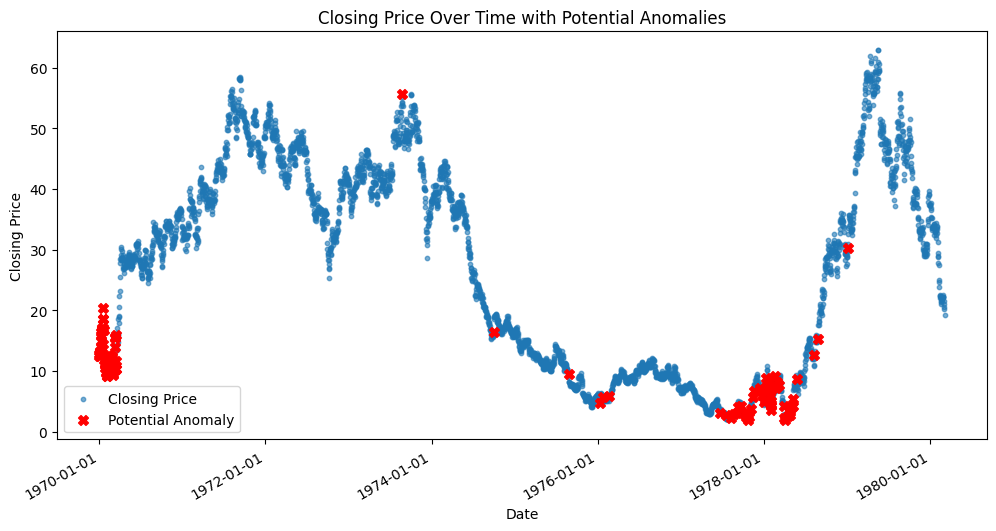

In [7]:
#Visualize potential anomalies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

# Plot the original closing price data
plt.scatter(df['date'], df['close'], label='Closing Price', alpha=0.6, s=10)

# Overlay the anomaly points
plt.scatter(anomalies['date'], anomalies['close'], color='red', marker='X', label='Potential Anomaly', s=50)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time with Potential Anomalies')
plt.legend()
plt.grid(False)

# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate() # Auto-rotate date labels

plt.show()